## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [2]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

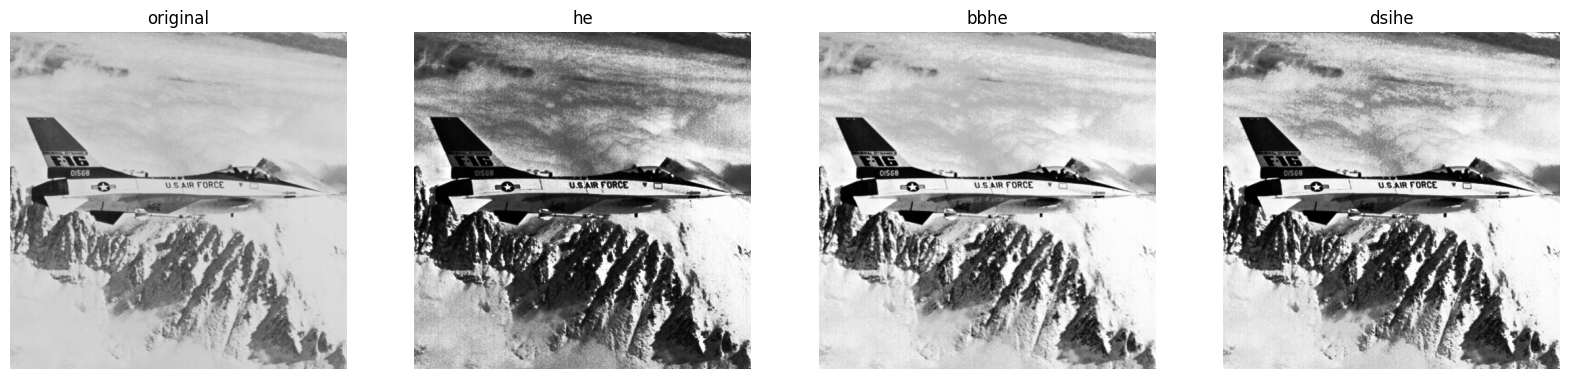

In [53]:
jet = cv2.imread('jet.bmp')

gray_jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)
bbhe_brg = int(np.mean(gray_jet))

hist = cv2.calcHist([gray_jet], [0], None, [256], [0, 256])
cumsum = np.cumsum(hist)
cumsum_abs = abs(cumsum - (cumsum[-1] / 2))
dsihe_brg = int(np.argmin(cumsum_abs))

bbhe_hist_1 = hist[:bbhe_brg]
bbhe_cumsum_1 = np.cumsum(bbhe_hist_1)
bbhe_norm_1 = bbhe_cumsum_1 / np.max(bbhe_cumsum_1)

bbhe_hist_2 = bbhe_hist_1 = hist[bbhe_brg:]
bbhe_cumsum_2 = np.cumsum(bbhe_hist_2)
bbhe_norm_2 = bbhe_cumsum_2 / np.max(bbhe_cumsum_2)

dsihe_hist_1 = hist[:dsihe_brg]
dsihe_cumsum_1 = np.cumsum(dsihe_hist_1)
dsihe_norm_1 = dsihe_cumsum_1 / np.max(dsihe_cumsum_1)

dsihe_hist_2 = hist[dsihe_brg:]
dsihe_cumsum_2 = np.cumsum(dsihe_hist_2)
dsihe_norm_2 = dsihe_cumsum_2 / np.max(dsihe_cumsum_2)


bbhe_c_1 = bbhe_norm_1 * bbhe_brg
bbhe_c_2 = bbhe_brg + 1 + (255 - bbhe_brg - 1) * bbhe_norm_2

dsihe_c_1 = dsihe_norm_1 * dsihe_brg
dsihe_c_2 = dsihe_brg + 1 + (255 - dsihe_brg - 1) * dsihe_norm_2

bbhe_c = np.concatenate((bbhe_c_1, bbhe_c_2)).astype('uint8')

dsihe_c = np.concatenate((dsihe_c_1, dsihe_c_2)).astype('uint8')


jet_bbhe = cv2.LUT(jet, bbhe_c) 
jet_dsihe = cv2.LUT(jet, dsihe_c)

jet_gray = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)
jet_he = cv2.equalizeHist(jet_gray)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(jet, 'gray', vmin=0, vmax=256)
axs[0].axis('off')
axs[0].set_title('original')

axs[1].imshow(jet_he, 'gray', vmin=0, vmax=256)
axs[1].axis('off')
axs[1].set_title('he')

axs[2].imshow(jet_bbhe, 'gray', vmin=0, vmax=256)
axs[2].axis('off')
axs[2].set_title('bbhe')

axs[3].imshow(jet_dsihe, 'gray', vmin=0, vmax=256)
axs[3].axis('off')
axs[3].set_title('dsihe')

print()